In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

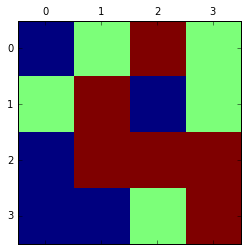

In [2]:
a = np.array([[1, 2, 3, 2], [2, 3, 1, 2], [1, 3, 3, 3], [1, 1, 2, 3]])
plt.matshow(a)

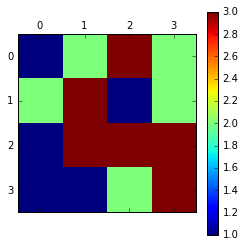

In [3]:
plt.matshow(a)
plt.colorbar()

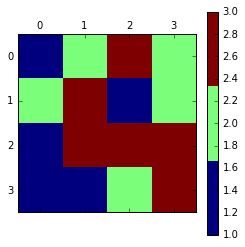

In [4]:
cmap = plt.get_cmap("jet", 3)
plt.matshow(a, cmap=cmap)
plt.colorbar()

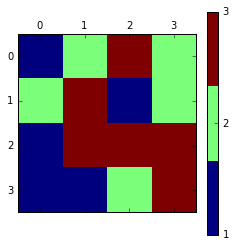

In [5]:
plt.matshow(a, cmap=cmap)
plt.colorbar(ticks=range(1,4))

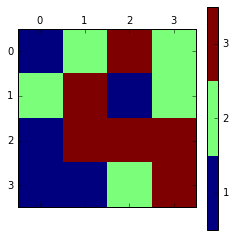

In [6]:
plt.matshow(a, cmap=cmap, vmin=0.5, vmax=3.5)
plt.colorbar(ticks=range(1,4))

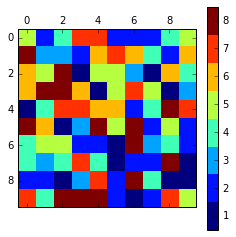

In [7]:
def discreteImage(matrix):
    max = np.max(matrix)
    min = np.min(matrix)
    cmap = plt.get_cmap("jet", max - min + 1)
    plt.matshow(matrix, cmap=cmap, vmin = min - 0.5, vmax = max + 0.5)
    plt.colorbar(ticks=np.arange(min, max + 1))
discreteImage(np.random.randint(1, 9, size=(10, 10)))

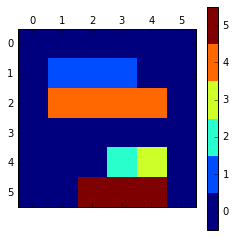

In [8]:
a = np.zeros((6, 6))
a[1, 1:4] = 1
a[4, 3] = 2
a[4, 4] = 3
a[2, 1:5] = 4
a[5, 2:5] = 5
discreteImage(a)

In [9]:
from scipy.ndimage import measurements

measurements.label(a)

(array([[0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 2, 0],
        [0, 0, 2, 2, 2, 0]]), 2)

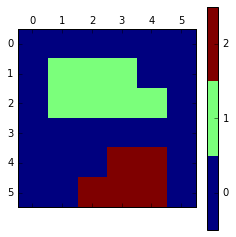

In [10]:
discreteImage(measurements.label(a)[0])

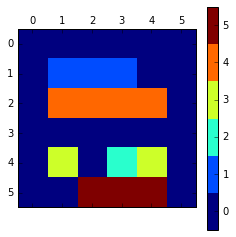

In [11]:
a[4, 1] = 3
discreteImage(a)

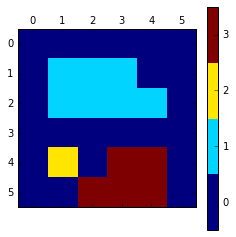

In [12]:
discreteImage(measurements.label(a)[0])

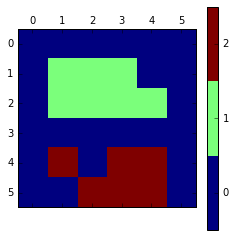

In [13]:
discreteImage(measurements.label(a, np.ones((3, 3)))[0])

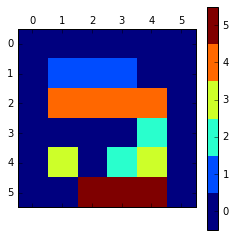

In [14]:
a[3, 4] = 2
discreteImage(a)

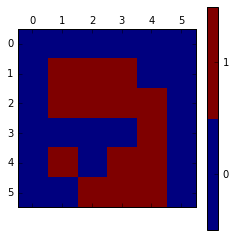

In [15]:
discreteImage(measurements.label(a, np.ones((3, 3)))[0])

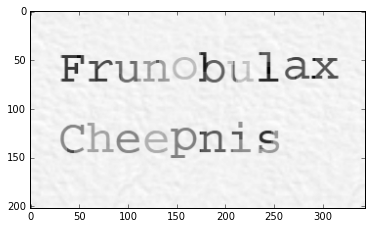

In [16]:
cheepnis = np.array(Image.open("cheepnis.png").convert("L"))
plt.imshow(cheepnis, cmap=cm.gray)

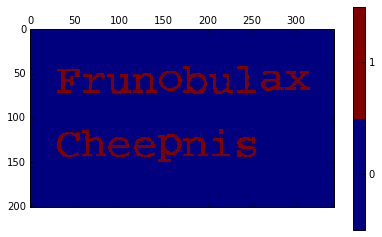

In [17]:
cheepnisBin = (cheepnis <= 230) * 1
discreteImage(cheepnisBin)

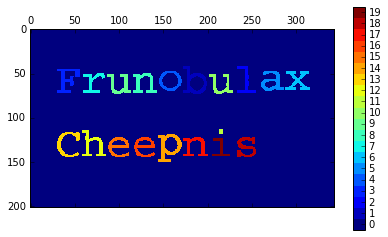

In [18]:
labeled = measurements.label(cheepnisBin, np.ones((3, 3)))[0]
discreteImage(labeled)

In [19]:
slices = measurements.find_objects(labeled)
slices

[(slice(43, 74, None), slice(173, 200, None)),
 (slice(43, 73, None), slice(234, 255, None)),
 (slice(46, 73, None), slice(31, 56, None)),
 (slice(48, 71, None), slice(146, 171, None)),
 (slice(48, 71, None), slice(261, 286, None)),
 (slice(49, 70, None), slice(288, 316, None)),
 (slice(51, 73, None), slice(60, 85, None)),
 (slice(51, 73, None), slice(116, 143, None)),
 (slice(52, 74, None), slice(87, 114, None)),
 (slice(52, 74, None), slice(202, 229, None)),
 (slice(114, 120, None), slice(213, 218, None)),
 (slice(115, 145, None), slice(59, 86, None)),
 (slice(117, 146, None), slice(31, 56, None)),
 (slice(120, 151, None), slice(144, 171, None)),
 (slice(123, 146, None), slice(88, 112, None)),
 (slice(123, 146, None), slice(117, 141, None)),
 (slice(123, 145, None), slice(173, 201, None)),
 (slice(123, 146, None), slice(234, 255, None)),
 (slice(124, 145, None), slice(205, 226, None))]

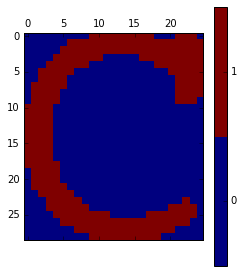

In [20]:
discreteImage(cheepnisBin[slices[12]])

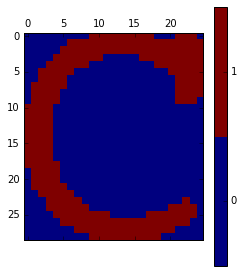

In [21]:
discreteImage(cheepnisBin[(slice(117, 146, None), slice(31, 56, None))])

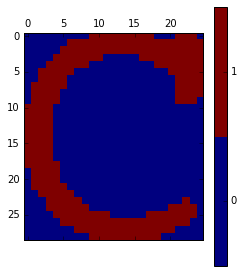

In [22]:
discreteImage(cheepnisBin[117:146, 31:56])

In [24]:
def line(arr, xFrom, yFrom, xTo, yTo):
    d = (yTo - yFrom) / (xTo - xFrom)
    for x in range(xFrom, xTo + 1):
        arr[round(d * (x - xFrom) + yFrom), x] = 0

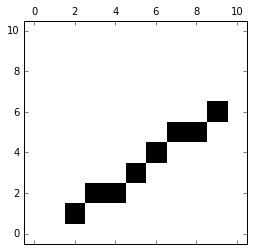

In [25]:
a = np.full((11, 11), 255, 'int')
line(a, 2, 1, 9, 6)
plt.matshow(a, cmap=cm.gray, origin='lower')

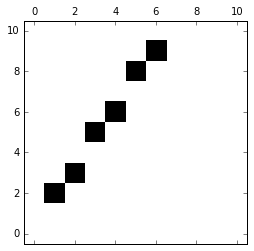

In [26]:
a = np.full((11, 11), 255, 'int')
line(a, 1, 2, 6, 9)
plt.matshow(a, cmap=cm.gray, origin='lower')

In [27]:
def line(arr, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    err = 0
    while True:
        arr[y1, x1] = 0
        if x1 == x2 and y1 == y2:
            break
        x1 += 1
        err -= dy
        if err < 0:
            y1 += 1
            err += dx

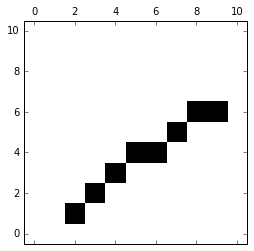

In [28]:
a = np.full((11, 11), 255, 'int')
line(a, 2, 1, 9, 6)
plt.matshow(a, cmap=cm.gray, origin='lower')

In [29]:
def line(arr, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    err = dx / 2
    while True:
        arr[y1, x1] = 0
        if x1 == x2 and y1 == y2:
            break
        x1 += 1
        err -= dy
        if err < 0:
            y1 += 1
            err += dx

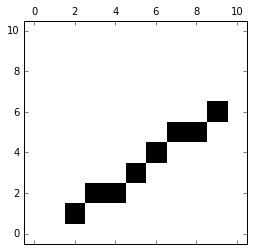

In [30]:
a = np.full((11, 11), 255, 'int')
line(a, 2, 1, 9, 6)
plt.matshow(a, cmap=cm.gray, origin='lower')

In [33]:
def line(arr, x1, y1, x2, y2):
    dx = abs(x2 - x1)
    sx = 1 if x1 < x2 else -1
    dy = -abs(y2 - y1)
    sy = 1 if y1 < y2 else -1
    err = dx + dy
    
    while True:
        arr[x1, y1] = 0
        if x1 == x2 and y1 == y2:
            break
        e2 = 2 * err
        if (e2 > dy):
            err += dy
            x1 += sx
        if (e2 < dx):
            err += dx
            y1 += sy

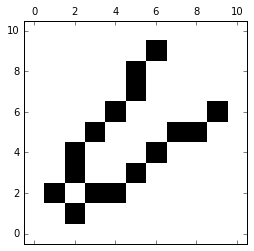

In [35]:
a = np.full((11, 11), 255, 'int')
line(a, 2, 1, 9, 6)
line(a, 6, 9, 1, 2)
plt.matshow(a, cmap=cm.gray, origin='lower')

In [36]:
def rectangle(arr, a, b, c):
    line(arr, *a, *b)
    line(arr, *b, *c)
    d = (c[0] + a[0] - b[0], c[1] + a[1] - b[1])
    line(arr, *c, *d)
    line(arr, *d, *a)

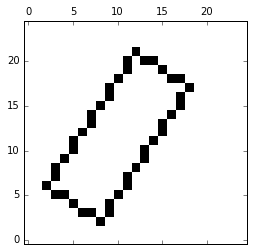

In [37]:
a = np.full((25, 25), 255, 'int')
rectangle(a, (6,2), (21,12), (17,18))
plt.matshow(a, cmap=cm.gray, origin="lower")